In [53]:
#import neccesary libraries
import pandas as pd
import numpy as np

In [54]:
#reading the file
Car_data=pd.read_csv("/content/DS1_C8_S2_SmartCarRiding_Data_Practice.csv")
Car_data

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [55]:
#Task1:
print("Number of rows:",Car_data.shape[0])
print("Number of columns:",Car_data.shape[1])
print("Column names:",Car_data.columns.tolist())

# Extract the 'fare_amount' column
fare_amount_column = Car_data['fare_amount']

Number of rows: 200000
Number of columns: 9
Column names: ['Index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


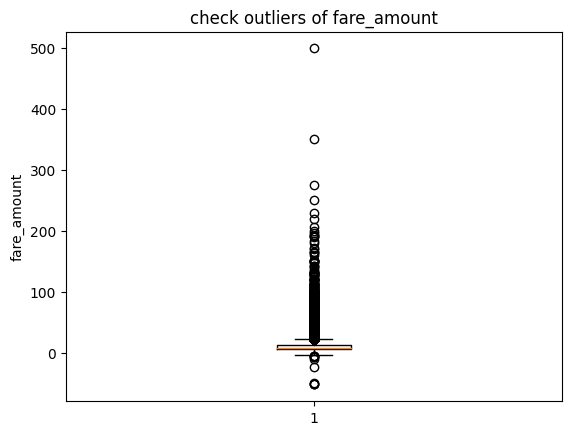

In [56]:
#Task2:find outliers
import matplotlib.pyplot as plt
plt.boxplot(Car_data["fare_amount"])
plt.title("check outliers of fare_amount")
plt.ylabel("fare_amount")
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


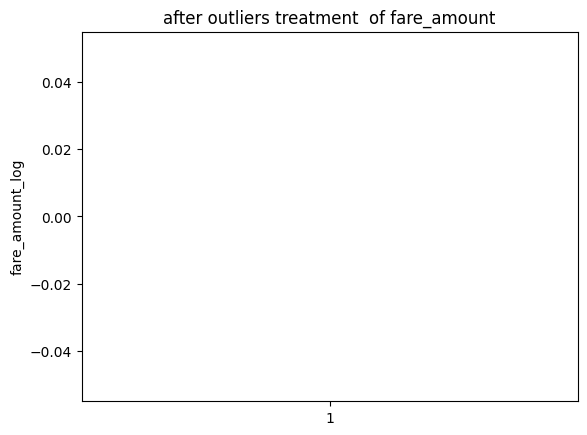

In [63]:
#treat outliers
Car_data['fare_amount_log'] = np.log(Car_data['fare_amount'])
import matplotlib.pyplot as plt
plt.boxplot(Car_data["fare_amount_log"])
plt.title("after outliers treatment  of fare_amount")
plt.ylabel("fare_amount_log")
plt.show()


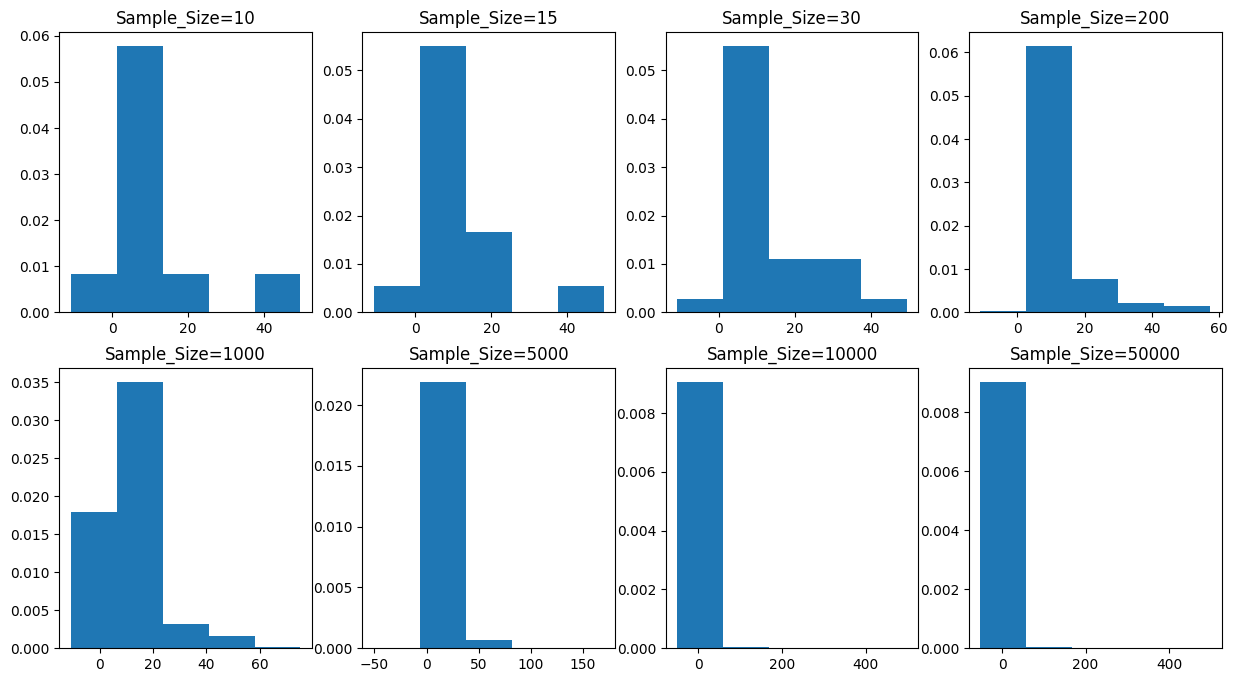

In [61]:
#Task3:
import numpy as np
import matplotlib.pyplot as plt
num=[10, 15, 30, 200, 1000, 5000, 10000, 50000, 100000]
data_s=[]
sample_df=pd.DataFrame()

fig,ax = plt.subplots(2,4,figsize =(15,8))
for i in num:
  sample_df=Car_data.sample(n=i,random_state=1,replace=True)
  data_s.append(sample_df["fare_amount"].tolist())

k=0
for i in range(0,2):
  for j in range(0,4):
    ax[i,j].hist(data_s[k],5,density= True)
    ax[i,j].set_title(label = "Sample_Size="+str(len(data_s[k])))
    k=k+1
plt.show()
#Interpretation: As the sample size increases, the distribution plots tend to become more symmetrical and bell-shaped, resembling a normal distribution. This is due to the Central Limit Theorem.

In [58]:
#Task4:
sample_size = 200

# Extract a random sample with replacement
sample_data = Car_data.sample(n=sample_size, replace=True)
sample_data

,Index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
79699,36623650,29:00.0,4.1,2009-08-10 15:29:00 UTC,-73.970153,40.759668,-73.975695,40.749608,1
159931,41928997,58:17.0,11.7,2012-04-28 18:58:17 UTC,-73.966584,40.792630,-73.967452,40.753605,2
184906,35290766,34:00.0,12.5,2014-09-13 01:34:00 UTC,-73.987302,40.747970,-74.004235,40.709872,6
128230,20141256,00:03.0,3.7,2010-07-04 17:00:03 UTC,-73.993307,40.731007,-73.984675,40.727285,3
113012,27633174,20:40.0,4.5,2009-02-15 12:20:40 UTC,-73.948586,40.781552,-73.947666,40.776246,1
...,...,...,...,...,...,...,...,...,...
128886,9001717,50:03.0,22.1,2010-09-12 18:50:03 UTC,-73.968422,40.764748,-73.972312,40.760565,1
41837,47954706,45:00.0,22.5,2013-04-04 23:45:00 UTC,-73.967072,40.756710,-73.992757,40.697447,1
42571,1200695,23:00.0,15.3,2010-01-12 13:23:00 UTC,-73.980888,40.753372,-74.004657,40.710650,1
145125,24089151,50:03.0,19.5,2013-06-05 11:50:03 UTC,-73.967909,40.751251,-73.962206,40.805317,1


In [64]:
#Task5:
Car_data_mean = Car_data['fare_amount'].mean()
Car_data_median = Car_data['fare_amount'].median()
Car_data_std = Car_data['fare_amount'].std()
Car_data_var = Car_data['fare_amount'].var()

# Calculate central tendency and dispersion for the sampled data
sample_data_mean = sample_data['fare_amount'].mean()
sample_data_median = sample_data['fare_amount'].median()
sample_data_std = sample_data['fare_amount'].std()
sample_data_var = sample_data['fare_amount'].var()

# Compare the measures
print("Car Riding Data:")
print("Mean:", Car_data_mean)
print("Median:", Car_data_median)
print("Standard Deviation:", Car_data_std)
print("Variance:", Car_data_var)

print("\nSampled Data (Size 200):")
print("Mean:", sample_data_mean)
print("Median:", sample_data_median)
print("Standard Deviation:", sample_data_std)
print("Variance:", sample_data_var)

# Check if the sampled data follows the Central Limit Theorem
# (Assuming the sample size is large enough)
if abs(sample_data_mean - Car_data_mean) / Car_data_std < 1.96:
    print("\nThe sampled data appears to follow the Central Limit Theorem.")
else:
    print("\nThe sampled data might not follow the Central Limit Theorem.")

Car Riding Data:
Mean: 11.359955250000002
Median: 8.5
Standard Deviation: 9.901776225068813
Variance: 98.04517241133802

Sampled Data (Size 200):
Mean: 11.5885
Median: 8.5
Standard Deviation: 9.539154685324728
Variance: 90.99547211055273

The sampled data appears to follow the Central Limit Theorem.


In [ ]:
'''Interpretation:The conclusion that "The sampled data appears to follow the Central Limit Theorem" is reasonable based on the given information.
Since the sample size is 200, which is generally considered large enough, the Central Limit Theorem suggests that the distribution of sample
means will be approximately normal, regardless of the underlying population distribution.'''